In [2]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [3]:
## Protein of interest is Beta-Secretase, a protein associated with ALzeihemers's Disease
target_protein = new_client.target
target_query = target_protein.search('Beta-Secretase').filter(target_type='SINGLE PROTEIN').filter(organism='Homo sapiens')
data = pd.DataFrame.from_dict(target_query)
data

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'Q9Y5Z0', 'xref_name': None, 'xre...",Homo sapiens,Beta secretase 2,18.0,False,CHEMBL2525,"[{'accession': 'Q9Y5Z0', 'component_descriptio...",SINGLE PROTEIN,9606
1,"[{'xref_id': 'Beta-secretase_1', 'xref_name': ...",Homo sapiens,Beta-secretase 1,18.0,False,CHEMBL4822,"[{'accession': 'P56817', 'component_descriptio...",SINGLE PROTEIN,9606
2,"[{'xref_id': 'P05067', 'xref_name': None, 'xre...",Homo sapiens,Beta amyloid A4 protein,15.0,False,CHEMBL2487,"[{'accession': 'P05067', 'component_descriptio...",SINGLE PROTEIN,9606
3,[],Homo sapiens,Gamma-secretase-activating protein,14.0,False,CHEMBL3638343,"[{'accession': 'A4D1B5', 'component_descriptio...",SINGLE PROTEIN,9606
4,"[{'xref_id': 'Q9NZ42', 'xref_name': None, 'xre...",Homo sapiens,Gamma-secretase subunit PEN-2,12.0,False,CHEMBL2374,"[{'accession': 'Q9NZ42', 'component_descriptio...",SINGLE PROTEIN,9606
...,...,...,...,...,...,...,...,...,...
269,[],Homo sapiens,Growth/differentiation factor 15,2.0,False,CHEMBL3120039,"[{'accession': 'Q99988', 'component_descriptio...",SINGLE PROTEIN,9606
270,[],Homo sapiens,Stromal cell-derived factor 1,2.0,False,CHEMBL3286074,"[{'accession': 'P48061', 'component_descriptio...",SINGLE PROTEIN,9606
271,[],Homo sapiens,Prosaposin,2.0,False,CHEMBL3580523,"[{'accession': 'P07602', 'component_descriptio...",SINGLE PROTEIN,9606
272,[],Homo sapiens,Melanocyte protein PMEL,2.0,False,CHEMBL3712988,"[{'accession': 'P40967', 'component_descriptio...",SINGLE PROTEIN,9606


In [4]:
## we want only the first protein: Beta secratese 1 
chosen_one = data.iloc[1]['target_chembl_id']

In [5]:
target_activity = new_client.activity
target_query = target_activity.filter(target_chembl_id=chosen_one).filter(standard_type='IC50')

In [6]:
df = pd.DataFrame.from_dict(target_query)

In [7]:
df ## constains all of the compunds that have been tested in this protein. 

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,bao_endpoint,bao_format,bao_label,canonical_smiles,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,78857,[],CHEMBL653511,Inhibitory activity against Beta-secretase 1 w...,B,BAO_0000190,BAO_0000357,single protein format,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,nM,UO_0000065,None,413.0
1,None,391560,[],CHEMBL653332,Compound was tested for its inhibitory activit...,B,BAO_0000190,BAO_0000357,single protein format,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,0.002
2,None,391983,[],CHEMBL653512,Inhibition of human Beta-secretase 1,B,BAO_0000190,BAO_0000357,single protein format,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,0.46
3,None,395858,[],CHEMBL653512,Inhibition of human Beta-secretase 1,B,BAO_0000190,BAO_0000357,single protein format,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,9.0
4,None,395859,[],CHEMBL653512,Inhibition of human Beta-secretase 1,B,BAO_0000190,BAO_0000357,single protein format,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9811,None,18771806,[],CHEMBL4268509,Inhibition of human BACE1 using rhodamine-EVNL...,B,BAO_0000190,BAO_0000357,single protein format,Cc1ccc(NC(=O)c2cc(=O)c3cc(/C=C/C(=O)OCCN(C)C)c...,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,10.0
9812,None,18771807,[],CHEMBL4268509,Inhibition of human BACE1 using rhodamine-EVNL...,B,BAO_0000190,BAO_0000357,single protein format,CN(C)CCOC(=O)/C=C/c1ccc2occ(C(=O)Nc3ccccc3)c(=...,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,10.0
9813,None,18771808,[],CHEMBL4268509,Inhibition of human BACE1 using rhodamine-EVNL...,B,BAO_0000190,BAO_0000357,single protein format,Cc1ccc(NC(=O)c2coc3ccc(/C=C/C(=O)OCCN(C)C)cc3c...,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,10.0
9814,None,18771809,[],CHEMBL4268509,Inhibition of human BACE1 using rhodamine-EVNL...,B,BAO_0000190,BAO_0000357,single protein format,O=C(O)/C=C/c1ccc2occ(C(=O)Nc3ccccc3)c(=O)c2c1,...,Homo sapiens,Beta-secretase 1,9606,None,None,IC50,uM,UO_0000065,None,10.0


In [8]:
## Dropping all the null values. (lost 108 observations)
df.dropna(subset=['standard_value'],inplace=True)

In [31]:
## Saving to csv 
df.to_csv('Beta-secretase-1.csv', index=False)

In [10]:
data = pd.read_csv('Beta-secretase-1.csv')

In [11]:
data.shape

(9708, 43)

In [12]:
## Changing the standard values to class type for classification type model. 
bioactivity_class =[]
for x in data.standard_value:
    if float(x) >= 10000:
        bioactivity_class.append('inactive')
    elif float(x) < 1000:
        bioactivity_class.append('active')
    else:
        bioactivity_class.append('min effect')

In [13]:
from collections import Counter
Counter(bioactivity_class)

Counter({'active': 6410, 'min effect': 1922, 'inactive': 1376})

In [14]:
## There is imbalance in the set of active and inactive compunds. 
## Now, we make a dataframe containing only the chembl_id, standard_value, canonical smile, and bioactivity class.
data['bioactivity_class'] = bioactivity_class
data2 = data[['bioactivity_class', 'molecule_chembl_id', 'canonical_smiles', 'standard_value']]
data2.reset_index(inplace=True)

In [15]:
data2

,index,bioactivity_class,molecule_chembl_id,canonical_smiles,standard_value
0,0,active,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,413.0
1,1,active,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,2.0
2,2,active,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,460.0
3,3,min effect,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,9000.0
4,4,min effect,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,5600.0
...,...,...,...,...,...
9703,9703,inactive,CHEMBL4292235,Cc1ccc(NC(=O)c2cc(=O)c3cc(/C=C/C(=O)OCCN(C)C)c...,10000.0
9704,9704,inactive,CHEMBL4286556,CN(C)CCOC(=O)/C=C/c1ccc2occ(C(=O)Nc3ccccc3)c(=...,10000.0
9705,9705,inactive,CHEMBL4284235,Cc1ccc(NC(=O)c2coc3ccc(/C=C/C(=O)OCCN(C)C)cc3c...,10000.0
9706,9706,inactive,CHEMBL4284580,O=C(O)/C=C/c1ccc2occ(C(=O)Nc3ccccc3)c(=O)c2c1,10000.0


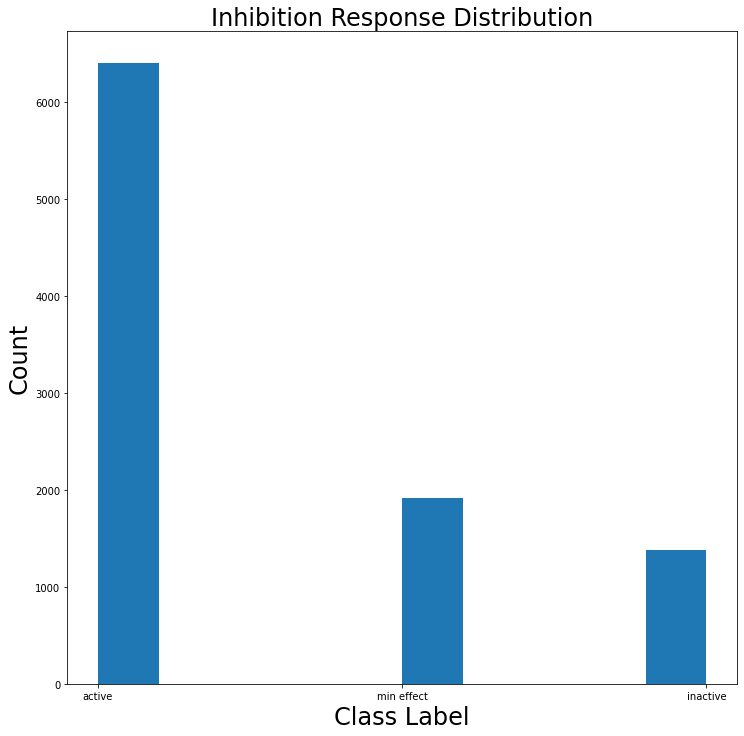

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.hist(data2['bioactivity_class'])
plt.xlabel('Class Label', fontsize=24)
plt.ylabel('Count', fontsize=24)
plt.title('Inhibition Response Distribution', fontsize=24)
plt.savefig('Inhibition Response Distribution.png')

## EDA using Lipinski Descriptors 

In [17]:
from rdkit import Chem
from rdkit.Chem import Lipinski, Descriptors
import numpy as np

In [18]:
## calculate the Lipinski descriptors of the compunds: Molecular Weight, Hydrogen bond donors, Hydrogen bond acceptors, and 
## octanol-water partition coefficent. 
def mol_descriptors(molecules, verbose=False):
    
    molData = []
    for x in molecules:
        mol = Chem.MolFromSmiles(x)
        molData.append(mol)
        
    storage = np.arange(1,1)
    i=0
    
    for y in molData:
        MolWt = Descriptors.MolWt(y)
        NumHDonors = Descriptors.NumHDonors(y)
        NumHAccept = Descriptors.NumHAcceptors(y)
        MolLogP = Descriptors.MolLogP(y)
        
        insert = np.array([MolWt, NumHDonors, NumHAccept, MolLogP])
        
        if (i==0):
            LipinskiData = insert
        else:
            LipinskiData = np.vstack([LipinskiData, insert])
        i=+1
        
    column_names = ['Molecular Weight', 'Number of Hydrogen Donors', 'Number of Hydrogen Acceptors', 'OWPC']
    Lipinski_descriptors = pd.DataFrame(LipinskiData,columns=column_names)
    
    return Lipinski_descriptors

In [19]:
df_lipinski = mol_descriptors(data2.canonical_smiles)

In [20]:
df_lipinski

,Molecular Weight,Number of Hydrogen Donors,Number of Hydrogen Acceptors,OWPC
0,999.085,13.0,13.0,-1.43550
1,893.005,12.0,12.0,-1.73610
2,751.988,8.0,9.0,2.35350
3,737.895,8.0,8.0,1.96260
4,828.020,8.0,8.0,3.57390
...,...,...,...,...
9703,420.465,1.0,6.0,3.47172
9704,406.438,1.0,6.0,3.16330
9705,420.465,1.0,6.0,3.47172
9706,335.315,2.0,4.0,3.14310


In [32]:
df_lipinski.to_csv('df-lipinski.csv', index=False)

In [26]:
df_full = pd.concat([data2, df_lipinski], axis=1)

In [29]:
df_full.drop(columns=['index'], inplace=True)

In [30]:
df_full.to_csv('Lipinksi - complete dataset', index=False)

In [33]:
df_full

,bioactivity_class,molecule_chembl_id,canonical_smiles,standard_value,Molecular Weight,Number of Hydrogen Donors,Number of Hydrogen Acceptors,OWPC
0,active,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,413.0,999.085,13.0,13.0,-1.43550
1,active,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,2.0,893.005,12.0,12.0,-1.73610
2,active,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,460.0,751.988,8.0,9.0,2.35350
3,min effect,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,9000.0,737.895,8.0,8.0,1.96260
4,min effect,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,5600.0,828.020,8.0,8.0,3.57390
...,...,...,...,...,...,...,...,...
9703,inactive,CHEMBL4292235,Cc1ccc(NC(=O)c2cc(=O)c3cc(/C=C/C(=O)OCCN(C)C)c...,10000.0,420.465,1.0,6.0,3.47172
9704,inactive,CHEMBL4286556,CN(C)CCOC(=O)/C=C/c1ccc2occ(C(=O)Nc3ccccc3)c(=...,10000.0,406.438,1.0,6.0,3.16330
9705,inactive,CHEMBL4284235,Cc1ccc(NC(=O)c2coc3ccc(/C=C/C(=O)OCCN(C)C)cc3c...,10000.0,420.465,1.0,6.0,3.47172
9706,inactive,CHEMBL4284580,O=C(O)/C=C/c1ccc2occ(C(=O)Nc3ccccc3)c(=O)c2c1,10000.0,335.315,2.0,4.0,3.14310


<AxesSubplot:>

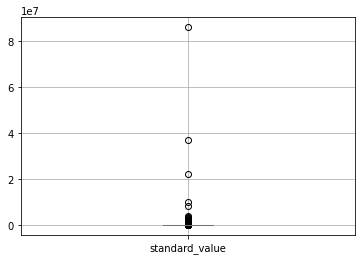

In [41]:
df_full.boxplot(column=['standard_value'])

#### We see the standard value (response variable) is highly skewed to the right, with many outliers. 
#### To improve our model's ability to predict standard values, we will convert the IC50 values to pIC50 using the formula:
#### -log(IC50 * 10^-9)

In [6]:
import pandas as pd
df_full = pd.read_csv('Lipinski- complete dataset.csv')

In [7]:
df_full

,bioactivity_class,molecule_chembl_id,canonical_smiles,standard_value,Molecular Weight,Number of Hydrogen Donors,Number of Hydrogen Acceptors,OWPC
0,active,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,413.0,999.085,13.0,13.0,-1.43550
1,active,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,2.0,893.005,12.0,12.0,-1.73610
2,active,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,460.0,751.988,8.0,9.0,2.35350
3,min effect,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,9000.0,737.895,8.0,8.0,1.96260
4,min effect,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,5600.0,828.020,8.0,8.0,3.57390
...,...,...,...,...,...,...,...,...
9703,inactive,CHEMBL4292235,Cc1ccc(NC(=O)c2cc(=O)c3cc(/C=C/C(=O)OCCN(C)C)c...,10000.0,420.465,1.0,6.0,3.47172
9704,inactive,CHEMBL4286556,CN(C)CCOC(=O)/C=C/c1ccc2occ(C(=O)Nc3ccccc3)c(=...,10000.0,406.438,1.0,6.0,3.16330
9705,inactive,CHEMBL4284235,Cc1ccc(NC(=O)c2coc3ccc(/C=C/C(=O)OCCN(C)C)cc3c...,10000.0,420.465,1.0,6.0,3.47172
9706,inactive,CHEMBL4284580,O=C(O)/C=C/c1ccc2occ(C(=O)Nc3ccccc3)c(=O)c2c1,10000.0,335.315,2.0,4.0,3.14310


In [33]:
df_full['standard_value'].describe()

count    9.708000e+03
mean     3.465020e+04
std      9.917863e+05
min      2.000000e-04
25%      2.800000e+01
50%      2.100000e+02
75%      2.250000e+03
max      8.600000e+07
Name: standard_value, dtype: float64

In [ ]:
## Setting a cutoff to the standad value will help with interpreting test results. Large IC50 values are already poor 
## candidates for clinical trials, so capping pIC50 values at 10000000 will our data more uniform without sacrificing 
## the validity of our conclusions. 

In [4]:
def standardize_and_conversion(dataset):
    store = []
    for x in dataset['standard_value']:
        ### Setting IC50 value cutoff at 10000000
        if x > 10000000:
            x = 10000000
        
        #### Converting IC50 value to molar values 
        molar_value = x*(10**-9)
        insert = -math.log(molar_value,10)
        store.append(insert)
    return store

In [47]:
Standard_value_norm = standardize(df_full.standard_value)

In [48]:
Standard_value_norm = pd.Series(Standard_value_norm)
Standard_value_norm.describe()

count    9.708000e+03
mean     2.280430e+04
std      2.498172e+05
min      2.000000e-04
25%      2.800000e+01
50%      2.100000e+02
75%      2.250000e+03
max      1.000000e+07
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1f8f87cf240>,
 'caps': [<matplotlib.lines.Line2D at 0x1f8f87cf7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f8f87c2f98>],
 'medians': [<matplotlib.lines.Line2D at 0x1f8f87cfda0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f8f87da0b8>],
 'means': []}

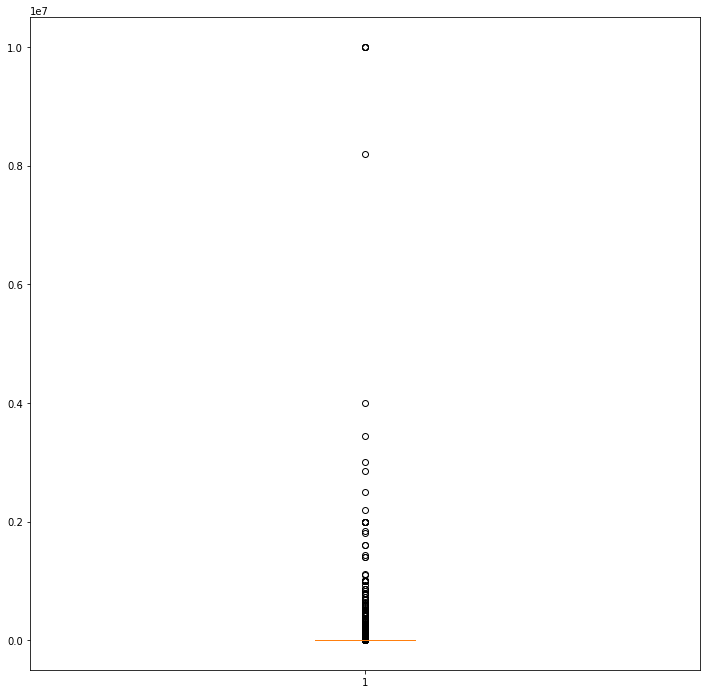

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.boxplot(Standard_value_norm)

In [51]:
pIC50 = conversion(Standard_value_norm)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f8f8825860>,
 'caps': [<matplotlib.lines.Line2D at 0x1f8f8825e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f8f88255f8>],
 'medians': [<matplotlib.lines.Line2D at 0x1f8f8839400>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f8f88396d8>],
 'means': []}

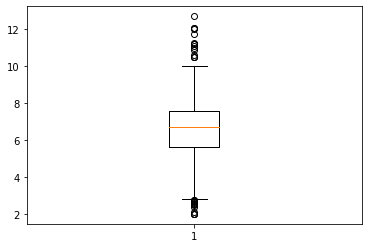

In [52]:
plt.boxplot(pIC50)

In [35]:
import pandas as pd
df_full = pd.read_csv('Lipinski- complete dataset.csv')

In [36]:
df_full

,bioactivity_class,molecule_chembl_id,canonical_smiles,standard_value,Molecular Weight,Number of Hydrogen Donors,Number of Hydrogen Acceptors,OWPC
0,active,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,413.0,999.085,13.0,13.0,-1.43550
1,active,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,2.0,893.005,12.0,12.0,-1.73610
2,active,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,460.0,751.988,8.0,9.0,2.35350
3,min effect,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,9000.0,737.895,8.0,8.0,1.96260
4,min effect,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,5600.0,828.020,8.0,8.0,3.57390
...,...,...,...,...,...,...,...,...
9703,inactive,CHEMBL4292235,Cc1ccc(NC(=O)c2cc(=O)c3cc(/C=C/C(=O)OCCN(C)C)c...,10000.0,420.465,1.0,6.0,3.47172
9704,inactive,CHEMBL4286556,CN(C)CCOC(=O)/C=C/c1ccc2occ(C(=O)Nc3ccccc3)c(=...,10000.0,406.438,1.0,6.0,3.16330
9705,inactive,CHEMBL4284235,Cc1ccc(NC(=O)c2coc3ccc(/C=C/C(=O)OCCN(C)C)cc3c...,10000.0,420.465,1.0,6.0,3.47172
9706,inactive,CHEMBL4284580,O=C(O)/C=C/c1ccc2occ(C(=O)Nc3ccccc3)c(=O)c2c1,10000.0,335.315,2.0,4.0,3.14310


In [293]:
import math 
def standardize_and_conversion_1(dataset):
    store = []
    for x in dataset['standard_value']:
        ### Setting IC50 value cutoff at 10000000
        if x > 1000000:
            x = 1000000
        
        #### Converting IC50 value to molar values 
        molar_value = x*(10**-9)
        insert = -math.log(molar_value,10)
        store.append(insert)
    return store

In [294]:
setting = standardize_and_conversion_1(df_full)

{'whiskers': [<matplotlib.lines.Line2D at 0x24328bfdaf0>,
 'caps': [<matplotlib.lines.Line2D at 0x243285a28e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24328bfd670>],
 'medians': [<matplotlib.lines.Line2D at 0x243289c73a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x243289c7b20>],
 'means': []}

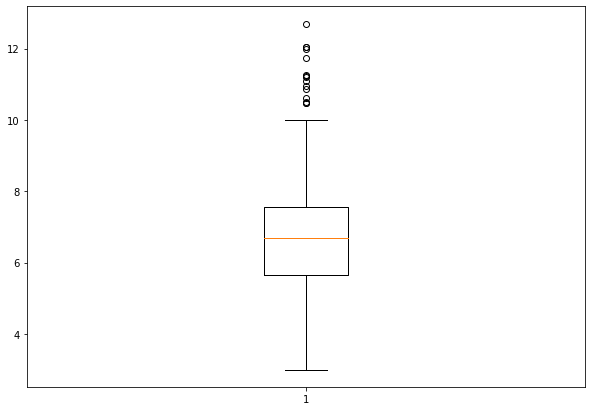

In [295]:
## plot shoing the effect of the molar value conversion on sample space. 
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(10,7))
plt.boxplot(setting)
#plt.savefig('pIC50 values(log1000)')

In [296]:
setting = pd.Series(setting)
setting.describe()

count    9708.000000
mean        6.558409
std         1.320022
min         3.000000
25%         5.647817
50%         6.677781
75%         7.552842
max        12.698970
dtype: float64

In [298]:
q3 = setting.quantile(0.75)
q1 = setting.quantile(0.25)
iqr = 1.5*(q3 -q1) + q3
setting.loc[setting > iqr]

4300    10.508638
8327    10.958607
8328    11.086186
8329    11.214670
8330    11.244125
8331    12.045757
8332    12.698970
8333    12.045757
8334    11.744727
8335    12.000000
9270    10.619789
9271    11.221849
9466    10.481486
9479    10.853872
9480    10.468521
dtype: float64

In [ ]:
## Since subset of outliers is small(15), removal of these values will be the best course of action as supposed to fitting 
## them into the model. 

In [303]:
insert_2 = setting[setting <= iqr]
df_full['pIC50'] = insert_2

In [311]:
df_full.pIC50.isnull().count()

9708

In [312]:
insert_2.count()

9693

In [319]:
df_full.insert(8, 'pIC50', insert_2)

In [320]:
df_full

,bioactivity_class,molecule_chembl_id,canonical_smiles,standard_value,Molecular Weight,Number of Hydrogen Donors,Number of Hydrogen Acceptors,OWPC,pIC50
0,active,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,413.0,999.085,13.0,13.0,-1.43550,6.384050
1,active,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,2.0,893.005,12.0,12.0,-1.73610,8.698970
2,active,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,460.0,751.988,8.0,9.0,2.35350,6.337242
3,min effect,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,9000.0,737.895,8.0,8.0,1.96260,5.045757
4,min effect,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,5600.0,828.020,8.0,8.0,3.57390,5.251812
...,...,...,...,...,...,...,...,...,...
9703,inactive,CHEMBL4292235,Cc1ccc(NC(=O)c2cc(=O)c3cc(/C=C/C(=O)OCCN(C)C)c...,10000.0,420.465,1.0,6.0,3.47172,5.000000
9704,inactive,CHEMBL4286556,CN(C)CCOC(=O)/C=C/c1ccc2occ(C(=O)Nc3ccccc3)c(=...,10000.0,406.438,1.0,6.0,3.16330,5.000000
9705,inactive,CHEMBL4284235,Cc1ccc(NC(=O)c2coc3ccc(/C=C/C(=O)OCCN(C)C)cc3c...,10000.0,420.465,1.0,6.0,3.47172,5.000000
9706,inactive,CHEMBL4284580,O=C(O)/C=C/c1ccc2occ(C(=O)Nc3ccccc3)c(=O)c2c1,10000.0,335.315,2.0,4.0,3.14310,5.000000


In [322]:
df_full.pIC50.describe()

count    9693.000000
mean        6.551103
std         1.307642
min         3.000000
25%         5.643974
50%         6.677781
75%         7.545155
max        10.000000
Name: pIC50, dtype: float64

In [324]:
q3 = df_full['pIC50'].quantile(0.75)
q1 = df_full['pIC50'].quantile(0.25)
iqr = 1.5*(q3 -q1) + q3
df_full['pIC50'].loc[df_full['pIC50'] > iqr]

Series([], Name: pIC50, dtype: float64)

<AxesSubplot:>

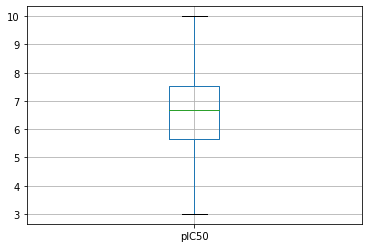

In [326]:
df_full.boxplot(column='pIC50') ## All outliers have been removed 

In [328]:
## Remove rows that are missing a pIC50 value 
df_full.dropna(inplace=True) ## Datset is now without any outliers in the response variable 

,bioactivity_class,molecule_chembl_id,canonical_smiles,standard_value,Molecular Weight,Number of Hydrogen Donors,Number of Hydrogen Acceptors,OWPC,pIC50
0,active,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,413.0,999.085,13.0,13.0,-1.43550,6.384050
1,active,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,2.0,893.005,12.0,12.0,-1.73610,8.698970
2,active,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,460.0,751.988,8.0,9.0,2.35350,6.337242
3,min effect,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,9000.0,737.895,8.0,8.0,1.96260,5.045757
4,min effect,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,5600.0,828.020,8.0,8.0,3.57390,5.251812
...,...,...,...,...,...,...,...,...,...
9703,inactive,CHEMBL4292235,Cc1ccc(NC(=O)c2cc(=O)c3cc(/C=C/C(=O)OCCN(C)C)c...,10000.0,420.465,1.0,6.0,3.47172,5.000000
9704,inactive,CHEMBL4286556,CN(C)CCOC(=O)/C=C/c1ccc2occ(C(=O)Nc3ccccc3)c(=...,10000.0,406.438,1.0,6.0,3.16330,5.000000
9705,inactive,CHEMBL4284235,Cc1ccc(NC(=O)c2coc3ccc(/C=C/C(=O)OCCN(C)C)cc3c...,10000.0,420.465,1.0,6.0,3.47172,5.000000
9706,inactive,CHEMBL4284580,O=C(O)/C=C/c1ccc2occ(C(=O)Nc3ccccc3)c(=O)c2c1,10000.0,335.315,2.0,4.0,3.14310,5.000000


In [331]:
df_full.drop(columns='standard_value',inplace=True)

In [332]:
df_full

,bioactivity_class,molecule_chembl_id,canonical_smiles,Molecular Weight,Number of Hydrogen Donors,Number of Hydrogen Acceptors,OWPC,pIC50
0,active,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,999.085,13.0,13.0,-1.43550,6.384050
1,active,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,893.005,12.0,12.0,-1.73610,8.698970
2,active,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,751.988,8.0,9.0,2.35350,6.337242
3,min effect,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,737.895,8.0,8.0,1.96260,5.045757
4,min effect,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,828.020,8.0,8.0,3.57390,5.251812
...,...,...,...,...,...,...,...,...
9703,inactive,CHEMBL4292235,Cc1ccc(NC(=O)c2cc(=O)c3cc(/C=C/C(=O)OCCN(C)C)c...,420.465,1.0,6.0,3.47172,5.000000
9704,inactive,CHEMBL4286556,CN(C)CCOC(=O)/C=C/c1ccc2occ(C(=O)Nc3ccccc3)c(=...,406.438,1.0,6.0,3.16330,5.000000
9705,inactive,CHEMBL4284235,Cc1ccc(NC(=O)c2coc3ccc(/C=C/C(=O)OCCN(C)C)cc3c...,420.465,1.0,6.0,3.47172,5.000000
9706,inactive,CHEMBL4284580,O=C(O)/C=C/c1ccc2occ(C(=O)Nc3ccccc3)c(=O)c2c1,335.315,2.0,4.0,3.14310,5.000000


In [333]:
df_full.to_csv('data-no outliers.csv')

In [2]:
import pandas as pd
df_full = pd.read_csv('data-no outliers.csv')

In [3]:
df_full

,Unnamed: 0,bioactivity_class,molecule_chembl_id,canonical_smiles,Molecular Weight,Number of Hydrogen Donors,Number of Hydrogen Acceptors,OWPC,pIC50
0,0,active,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,999.085,13.0,13.0,-1.43550,6.384050
1,1,active,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,893.005,12.0,12.0,-1.73610,8.698970
2,2,active,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,751.988,8.0,9.0,2.35350,6.337242
3,3,min effect,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,737.895,8.0,8.0,1.96260,5.045757
4,4,min effect,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,828.020,8.0,8.0,3.57390,5.251812
...,...,...,...,...,...,...,...,...,...
9703,9703,inactive,CHEMBL4292235,Cc1ccc(NC(=O)c2cc(=O)c3cc(/C=C/C(=O)OCCN(C)C)c...,420.465,1.0,6.0,3.47172,5.000000
9704,9704,inactive,CHEMBL4286556,CN(C)CCOC(=O)/C=C/c1ccc2occ(C(=O)Nc3ccccc3)c(=...,406.438,1.0,6.0,3.16330,5.000000
9705,9705,inactive,CHEMBL4284235,Cc1ccc(NC(=O)c2coc3ccc(/C=C/C(=O)OCCN(C)C)cc3c...,420.465,1.0,6.0,3.47172,5.000000
9706,9706,inactive,CHEMBL4284580,O=C(O)/C=C/c1ccc2occ(C(=O)Nc3ccccc3)c(=O)c2c1,335.315,2.0,4.0,3.14310,5.000000


In [5]:
df_full.dropna(inplace=True)

In [6]:
df_full

,Unnamed: 0,bioactivity_class,molecule_chembl_id,canonical_smiles,Molecular Weight,Number of Hydrogen Donors,Number of Hydrogen Acceptors,OWPC,pIC50
0,0,active,CHEMBL406146,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CCC(=O...,999.085,13.0,13.0,-1.43550,6.384050
1,1,active,CHEMBL78946,CC(C)C[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](N...,893.005,12.0,12.0,-1.73610,8.698970
2,2,active,CHEMBL324109,CCC(C)C[C@H](NC(=O)[C@H](CC(C)C)NC(C)=O)[C@@H]...,751.988,8.0,9.0,2.35350,6.337242
3,3,min effect,CHEMBL114147,CC(=O)NCC(=O)N[C@@H](Cc1ccccc1)[C@@H](O)CC(=O)...,737.895,8.0,8.0,1.96260,5.045757
4,4,min effect,CHEMBL419949,CC(=O)N[C@@H](Cc1ccccc1)C(=O)N[C@@H](Cc1ccccc1...,828.020,8.0,8.0,3.57390,5.251812
...,...,...,...,...,...,...,...,...,...
9703,9703,inactive,CHEMBL4292235,Cc1ccc(NC(=O)c2cc(=O)c3cc(/C=C/C(=O)OCCN(C)C)c...,420.465,1.0,6.0,3.47172,5.000000
9704,9704,inactive,CHEMBL4286556,CN(C)CCOC(=O)/C=C/c1ccc2occ(C(=O)Nc3ccccc3)c(=...,406.438,1.0,6.0,3.16330,5.000000
9705,9705,inactive,CHEMBL4284235,Cc1ccc(NC(=O)c2coc3ccc(/C=C/C(=O)OCCN(C)C)cc3c...,420.465,1.0,6.0,3.47172,5.000000
9706,9706,inactive,CHEMBL4284580,O=C(O)/C=C/c1ccc2occ(C(=O)Nc3ccccc3)c(=O)c2c1,335.315,2.0,4.0,3.14310,5.000000


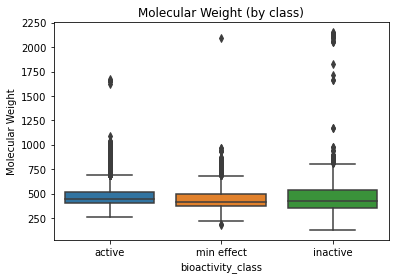

In [10]:
## Obtain the graphs of descriptors to show differences between class (active, inactive, min Effect)
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='bioactivity_class', y='Molecular Weight', data=df_full)
plt.title('Molecular Weight (by class)')
plt.savefig('Molecular Weight Dist.png')

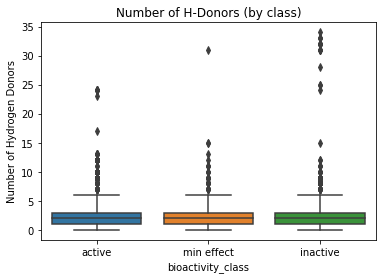

In [11]:
sns.boxplot(x='bioactivity_class', y='Number of Hydrogen Donors', data=df_full)
plt.title('Number of H-Donors (by class)')
plt.savefig('Number of H-Donors Dist.png')

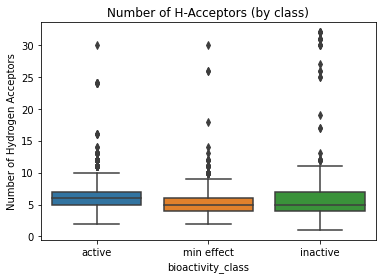

In [12]:
sns.boxplot(x='bioactivity_class', y='Number of Hydrogen Acceptors', data=df_full)
plt.title('Number of H-Acceptors (by class)')
plt.savefig('Number of H-Acceptors.png')

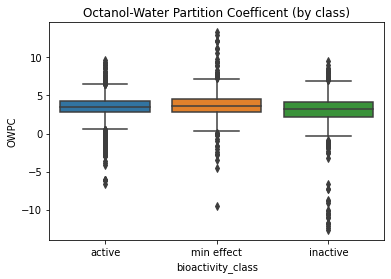

In [13]:
sns.boxplot(x='bioactivity_class', y='OWPC', data=df_full)
plt.title('Octanol-Water Partition Coefficent (by class)')
plt.savefig('octanol-water partition coefficent.png')